# Import 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from tabulate import tabulate
import seaborn as sns

##  Data Investigation

In [2]:
data = pd.read_csv('Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
disc = pd.read_csv('dict.csv')
print(tabulate(disc, headers = 'keys', tablefmt = 'psql'))    

+----+---------------+------------------------------------------------------------------------------------------------------------------+
|    | Column Name   | Description                                                                                                      |
|----+---------------+------------------------------------------------------------------------------------------------------------------|
|  0 | country       | Name of the country                                                                                              |
|  1 | child_mort    | Death of children under 5 years of age per 1000 live births                                                      |
|  2 | exports       | Exports of goods and services per capita. Given as %age of the GDP per capita                                    |
|  3 | health        | Total health spending per capita. Given as %age of GDP per capita                                                |
|  4 | imports       | Imports of 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
print('The shape of the dataset is:', data.shape)

The shape of the dataset is: (167, 10)


In [6]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
len(data[data.duplicated()])

0

In [8]:
cols = np.array(data.columns[1:]).reshape(9,-1)
cols.shape

(9, 1)

# Visualize each Feature

C:\Users\mstka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mstka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mstka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

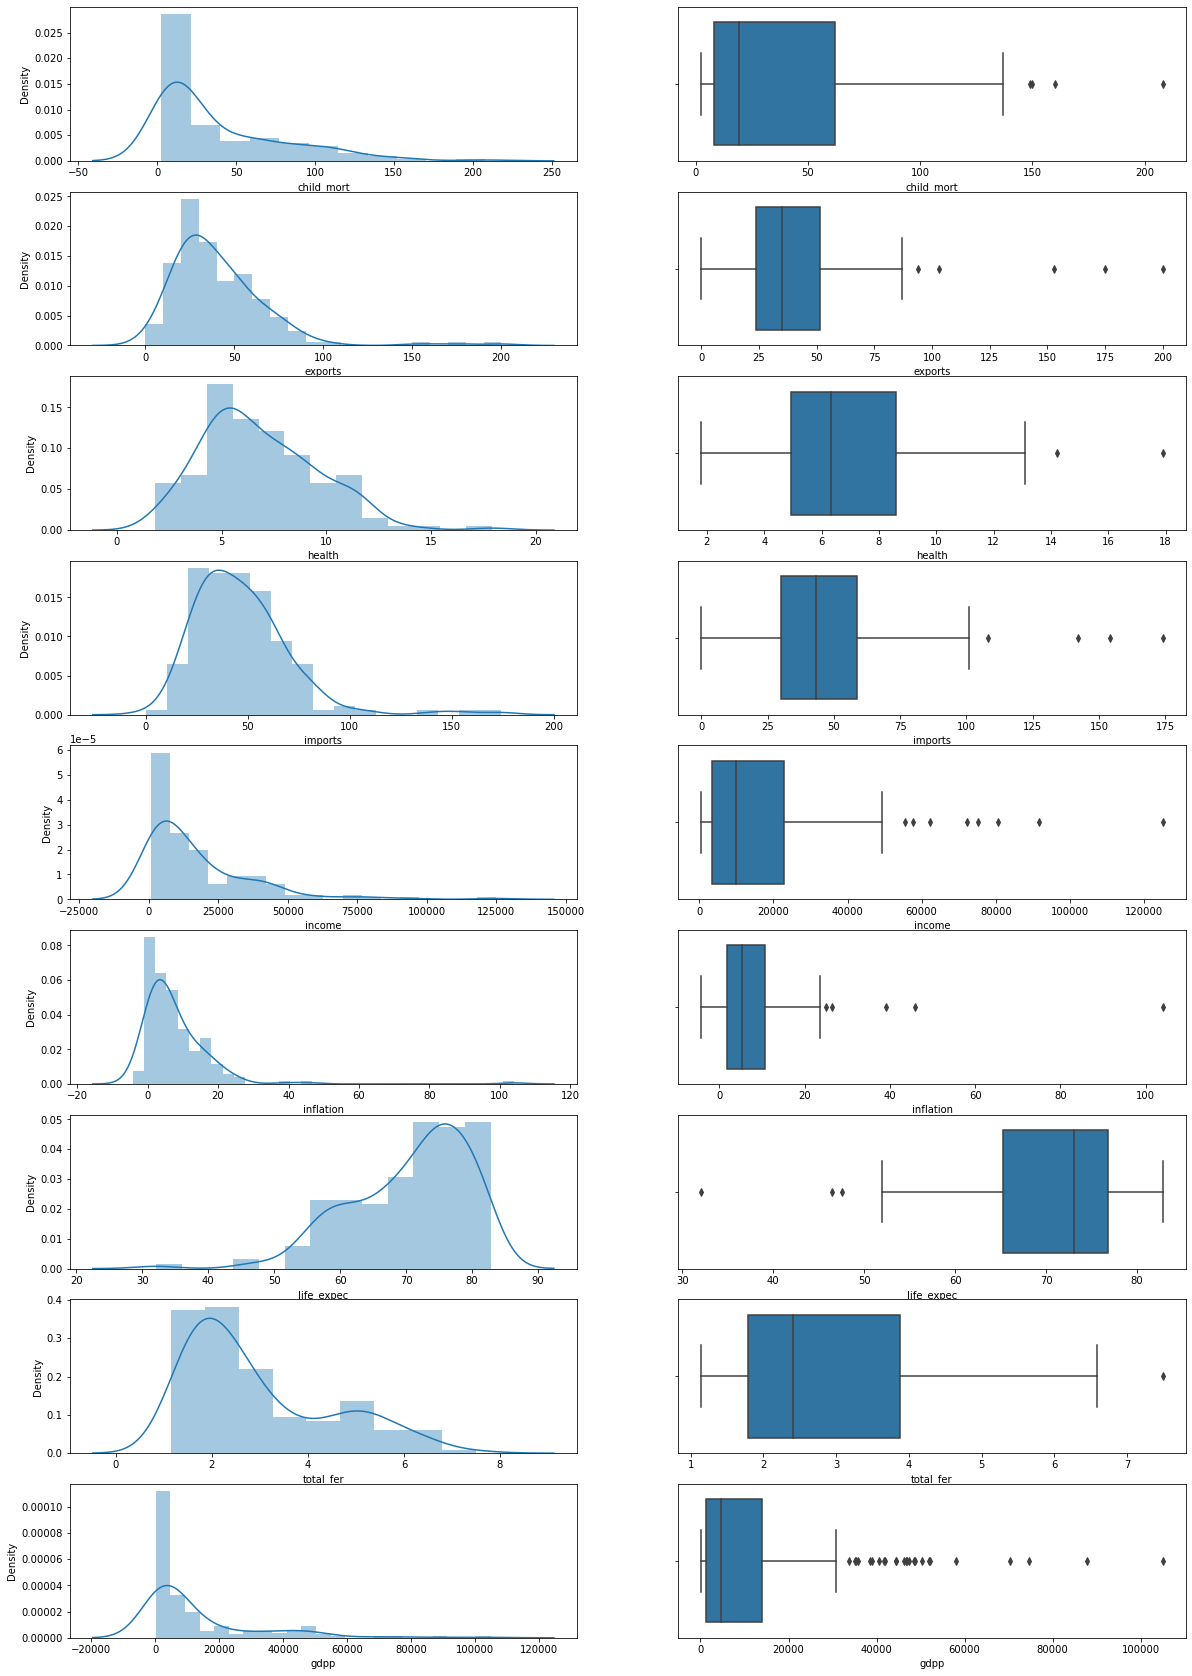

In [9]:
fig,ax = plt.subplots(9,2,figsize=(20,30))
for i in range(0,9):
        sns.distplot(data.loc[:,cols[i][0]],ax = ax[i][0])
        sns.boxplot(data.loc[:,cols[i][0]],ax = ax[i][1])
        plt.xlabel(cols[i][0])
plt.show()

 From the above we can see that the data is **highly skewed.** Also, there seems to be quite a **few outliers** in almost all the features.  Replaced by the *median* of the dataset 

In [10]:
# Child Mortality
print(data[data['child_mort']>=120][['country','child_mort']].sort_values(by='child_mort',ascending=False))
print (f"Median equals to {np.median(data['child_mort'])}")

#replace outlier with median 
idx_cm = data[data['child_mort']>=120][['country','child_mort']].sort_values(by='child_mort',ascending=False).index.to_list()
data.loc[idx_cm,'child_mort'] = np.median(data['child_mort'])
print(data.loc[idx_cm,'child_mort'])

                      country  child_mort
66                      Haiti       208.0
132              Sierra Leone       160.0
32                       Chad       150.0
31   Central African Republic       149.0
97                       Mali       137.0
113                   Nigeria       130.0
112                     Niger       123.0
Median equals to 19.3
66     19.3
132    19.3
32     19.3
31     19.3
97     19.3
113    19.3
112    19.3
Name: child_mort, dtype: float64


In [11]:
# Export
exprt_o = data[data['exports']>=90][['country','exports']].sort_values(by='exports',ascending=False)
print(exprt_o)
print('')
print (f"Median equals to {np.median(data['exports'])}")

#replace outlier with median 
idx_exprt_o = data[data['exports']>=90][['country','exports']].sort_values(by='exports',ascending=False).index.to_list()
data.loc[idx_exprt_o,'exports']= np.median(data['exports'])
print(data.loc[idx_exprt_o,'exports'])

        country  exports
133   Singapore    200.0
91   Luxembourg    175.0
98        Malta    153.0
73      Ireland    103.0
131  Seychelles     93.8

Median equals to 35.0
133    35.0
91     35.0
98     35.0
73     35.0
131    35.0
Name: exports, dtype: float64


In [12]:
# Health
health_o = data[data['health']>=13][['country','health']].sort_values(by='health',ascending=False)
print(health_o)
print('')
print (f"Median equals to {np.median(data['health'])}")

#replace outlier with median 
idx_h = data[data['health']>=13][['country','health']].sort_values(by='health',ascending=False).index.to_list()
data.loc[idx_h,'health']= np.median(data['health'])
print(data.loc[idx_h,'health'])

                   country  health
159          United States    17.9
101  Micronesia, Fed. Sts.    14.2
132           Sierra Leone    13.1

Median equals to 6.32
159    6.32
101    6.32
132    6.32
Name: health, dtype: float64


In [13]:
# imports
imports_o = data[data['imports']>=100][['country','imports']].sort_values(by='imports',ascending=False)
print(imports_o)
print('')
print (f"Median equals to {np.median(data['imports'])}")

#replace outlier with median 
imports_o = data[data['imports']>=100][['country','imports']].sort_values(by='imports',ascending=False).index.to_list()
data.loc[imports_o,'imports']= np.median(data['imports'])
print(data.loc[imports_o,'imports'])

        country  imports
133   Singapore    174.0
98        Malta    154.0
91   Luxembourg    142.0
131  Seychelles    108.0
87      Lesotho    101.0

Median equals to 43.3
133    43.3
98     43.3
91     43.3
131    43.3
87     43.3
Name: imports, dtype: float64


In [14]:
# income 
income_o = data[data['income']>=50000][['country','income']].sort_values(by='income',ascending=False)
print(income_o)
print('')
print (f"Median equals to {np.median(data['income'])}")
#replace outlier with median 
income_o = data[data['income']>=50000][['country','income']].sort_values(by='income',ascending=False).index.to_list()
data.loc[income_o,'income']= np.median(data['income'])
print(data.loc[income_o,'income'])

                  country  income
123                 Qatar  125000
91             Luxembourg   91700
23                 Brunei   80600
82                 Kuwait   75200
133             Singapore   72100
114                Norway   62300
157  United Arab Emirates   57600
145           Switzerland   55500

Median equals to 9960.0
123    9960
91     9960
23     9960
82     9960
133    9960
114    9960
157    9960
145    9960
Name: income, dtype: int64


In [15]:
# inflation
inflation_o = data[data['inflation']>=30][['country','inflation']].sort_values(by='inflation',ascending=False)
print(inflation_o)
print('')
print (f"Median equals to {np.median(data['inflation'])}")
#replace outlier with median 
inflation_o = data[data['inflation']>=30][['country','inflation']].sort_values(by='inflation',ascending=False).index.to_list()
data.loc[inflation_o,'inflation']= np.median(data['inflation'])
print(data.loc[inflation_o,'inflation'])

       country  inflation
113    Nigeria      104.0
163  Venezuela       45.9
103   Mongolia       39.2

Median equals to 5.39
113    5.39
163    5.39
103    5.39
Name: inflation, dtype: float64


In [16]:
# life_expec
life_expec_o = data[data['life_expec']<50][['country','life_expec']].sort_values(by='life_expec',ascending=False)
print(life_expec_o)
print('')
print (f"Median equals to {np.median(data['life_expec'])}")
#replace outlier with median 
life_expec_o = data[data['life_expec']<50][['country','life_expec']].sort_values(by='life_expec',ascending=False).index.to_list()
data.loc[life_expec_o,'life_expec']= np.median(data['life_expec'])

print(data.loc[life_expec_o,'life_expec'])

                     country  life_expec
31  Central African Republic        47.5
87                   Lesotho        46.5
66                     Haiti        32.1

Median equals to 73.1
31    73.1
87    73.1
66    73.1
Name: life_expec, dtype: float64


In [17]:
# total_fer
total_fer_o = data[data['total_fer']>7][['country','total_fer']].sort_values(by='total_fer',ascending=False)
print(total_fer_o)
print('')
print (f"Median equals to {np.median(data['life_expec'])}")
#replace outlier with median 
total_fer_o = data[data['total_fer']>7][['country','total_fer']].sort_values(by='total_fer',ascending=False).index.to_list()
data.loc[total_fer_o,'total_fer']= np.median(data['total_fer'])

print(data.loc[total_fer_o,'total_fer'])

    country  total_fer
112   Niger       7.49

Median equals to 73.1
112    2.41
Name: total_fer, dtype: float64


C:\Users\mstka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mstka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mstka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

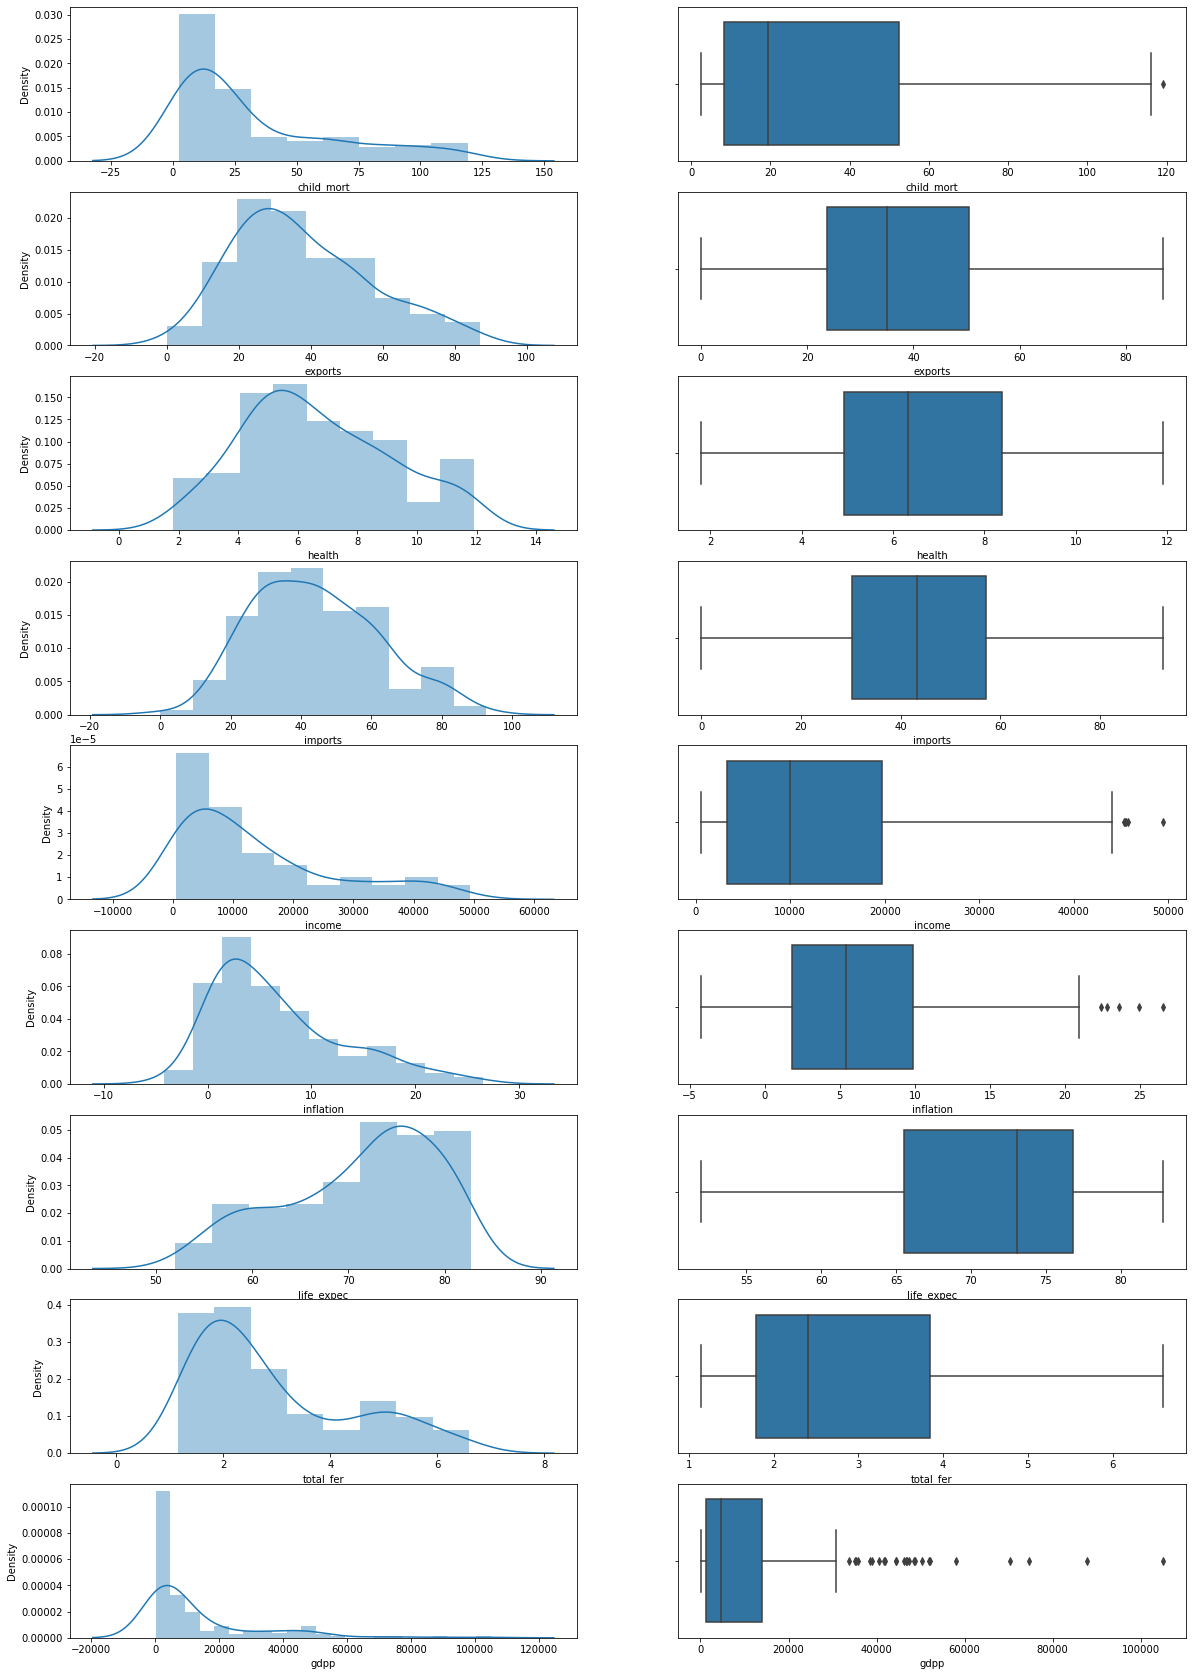

In [18]:
fig,ax = plt.subplots(9,2,figsize=(20,30))
for i in range(0,9):
        sns.distplot(data.loc[:,cols[i][0]],ax = ax[i][0])
        sns.boxplot(data.loc[:,cols[i][0]],ax = ax[i][1])
        plt.xlabel(cols[i][0])
plt.show()

Now , Time to Normal Distribution 

# Data Scaling

In [19]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,32.749701,37.816760,6.658563,44.120754,13909.239521,6.746323,71.113772,2.917545,12964.155689
std,32.348229,19.139999,2.493631,17.824330,12894.978402,6.347784,7.955834,1.472504,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,52.000000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.500000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,52.450000,50.500000,8.380000,57.200000,19750.000000,9.905000,76.800000,3.845000,14050.000000
max,119.000000,86.900000,11.900000,92.600000,49400.000000,26.500000,82.800000,6.590000,105000.000000


income & health have differnet scales

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [21]:
data_cpy = data.drop('country', axis=1)

Standered scaler for PCA but Robust Scaler gives better result

In [22]:
X = StandardScaler().fit_transform(np.asarray(data_cpy))

In [23]:
df = pd.DataFrame(X)
df.describe()

,0,1,2,3,4,5,6,7,8
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-6.382120e-17,3.053944e-16,6.282400e-17,6.980444e-17,-5.584355e-17,6.116199e-17,6.009830e-16,-1.462569e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-9.348387e-01,-1.976028e+00,-1.950226e+00,-2.479047e+00,-1.034530e+00,-1.731199e+00,-2.409711e+00,-1.203977e+00,-6.968005e-01
25%,-7.596516e-01,-7.345307e-01,-6.992981e-01,-7.833462e-01,-8.209383e-01,-7.799839e-01,-7.077393e-01,-7.646300e-01,-6.366596e-01
50%,-4.170290e-01,-1.476088e-01,-1.361793e-01,-4.618532e-02,-3.071829e-01,-2.143114e-01,2.504076e-01,-3.457181e-01,-4.544309e-01
75%,6.108386e-01,6.646492e-01,6.924096e-01,7.359930e-01,4.543107e-01,4.990996e-01,7.168738e-01,6.317431e-01,5.942100e-02
max,2.674326e+00,2.572145e+00,2.108251e+00,2.728015e+00,2.760571e+00,3.121260e+00,1.473306e+00,2.501521e+00,5.036507e+00


In [24]:
transformer = RobustScaler().fit_transform(np.asarray(data_cpy))
df_tran = pd.DataFrame(transformer)
df_tran.describe()

,0,1,2,3,4,5,6,7,8
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.304292,0.105497,0.097851,0.030398,0.240881,0.167551,-0.175772,0.247583,0.652842
std,0.731860,0.716854,0.720703,0.660160,0.786519,0.784161,0.704056,0.718295,1.440936
min,-0.377828,-1.306779,-1.303468,-1.601263,-0.570357,-1.185917,-1.867257,-0.614634,-0.348192
25%,-0.250000,-0.419476,-0.404624,-0.485185,-0.402867,-0.442248,-0.672566,-0.300000,-0.261792
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.580524,0.595376,0.514815,0.597133,0.557752,0.327434,0.700000,0.738208
max,2.255656,1.943820,1.612717,1.825926,2.405611,2.607783,0.858407,2.039024,7.888365


# PCA 

In [25]:
#PCA FOR STANDERIZED DATA WITH MEAN = 0 AND VARIANCE = 1
from sklearn.decomposition import PCA 
pca = PCA(7) 
pca_X = pca.fit_transform(X)

In [26]:
print(pca_X.shape)
# determine best number of component 
v = pca.explained_variance_ratio_ 
print (v)
"""plt.plot(v,'X-')
plt.xlabel('n_components')
plt.ylabel('variance')
plt.show()"""

(167, 7)
[0.45092771 0.16249152 0.1292406  0.09334765 0.06127242 0.03806345
 0.02584465]


"plt.plot(v,'X-')\nplt.xlabel('n_components')\nplt.ylabel('variance')\nplt.show()"

# Clustering Techniques

In [27]:

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


## K-MEANS 

KMeans 
 Silhouette Score: 0.7012273943112397


C:\Users\mstka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


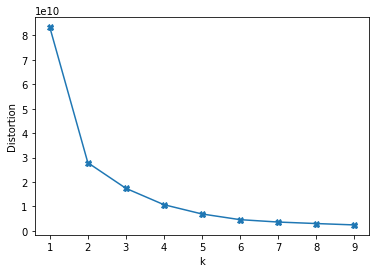

In [28]:
#K_means without PCA 
kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(data_cpy)
print('KMeans', '\n', f'Silhouette Score: {silhouette_score(data_cpy,kmean.labels_)}')
dist = []
k_range = range (1,10)
for k in k_range :
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(data_cpy)
    dist.append(model.inertia_)

plt.figure()
plt.plot(k_range,dist,'X-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

KMeans 
 Silhouette Score: 0.25371090167578925


C:\Users\mstka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


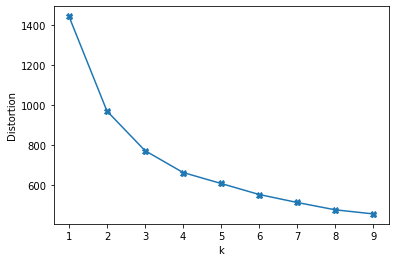

In [29]:
#K_means without PCA 
kmean = KMeans(n_clusters=4, random_state=0)
kmean.fit(pca_X)
print('KMeans', '\n', f'Silhouette Score: {silhouette_score(pca_X,kmean.labels_)}')
dist = []
k_range = range (1,10)
for k in k_range :
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(pca_X)
    dist.append(model.inertia_)

plt.figure()
plt.plot(k_range,dist,'X-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

## Hierarchical Clustering

In [30]:
#complete linkage
hcl = AgglomerativeClustering(n_clusters=3,linkage='complete')
hcl_labels = hcl.fit_predict(data_cpy)
print('Hierarchical Agglomeretive : complete linkage', '\n', f'Silhouette Score: {silhouette_score(data_cpy, hcl_labels)}')

Hierarchical Agglomeretive : complete linkage 
 Silhouette Score: 0.6307844245910368


In [31]:
#avg linkage
hcl = AgglomerativeClustering(n_clusters=3,linkage='average')
hcl_labels = hcl.fit_predict(data_cpy)
print('Hierarchical Agglomeretive : averaage linkage', '\n', f'Silhouette Score: {silhouette_score(data_cpy, hcl_labels)}')

Hierarchical Agglomeretive : averaage linkage 
 Silhouette Score: 0.6844473267520315


In [32]:
#single linkage
hcl = AgglomerativeClustering(n_clusters=3,linkage='single')
hcl_labels = hcl.fit_predict(data_cpy)
print('Hierarchical Agglomeretive : single linkage', '\n', f'Silhouette Score: {silhouette_score(data_cpy,hcl_labels)}')

Hierarchical Agglomeretive : single linkage 
 Silhouette Score: 0.6528847319260671


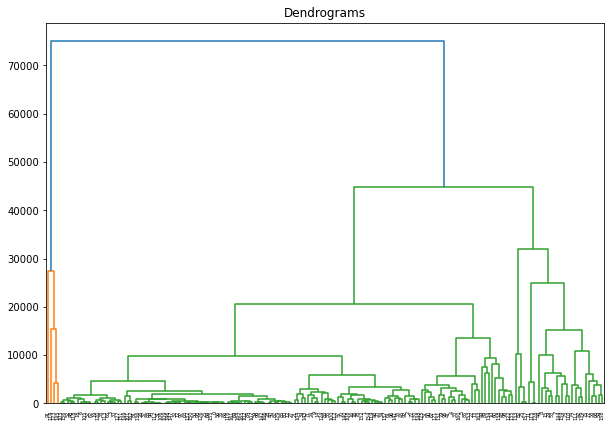

In [33]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_cpy, method='average'))

# Using PCA 

In [34]:
#complete linkage
hcl = AgglomerativeClustering(n_clusters=3,linkage='complete')
hcl_labels = hcl.fit_predict(pca_X)
print('Hierarchical Agglomeretive : complete linkage', '\n', f'Silhouette Score: {silhouette_score(pca_X, hcl_labels)}')

Hierarchical Agglomeretive : complete linkage 
 Silhouette Score: 0.18232522219988656


In [35]:
#complete linkage
hcl = AgglomerativeClustering(n_clusters=3,linkage='average')
hcl_labels = hcl.fit_predict(pca_X)
print('Hierarchical Agglomeretive : complete linkage', '\n', f'Silhouette Score: {silhouette_score(pca_X, hcl_labels)}')

Hierarchical Agglomeretive : complete linkage 
 Silhouette Score: 0.2686510947561851


In [36]:
#complete linkage
hcl = AgglomerativeClustering(n_clusters=3,linkage='single')
hcl_labels = hcl.fit_predict(pca_X)
print('Hierarchical Agglomeretive : complete linkage', '\n', f'Silhouette Score: {silhouette_score(pca_X, hcl_labels)}')

Hierarchical Agglomeretive : complete linkage 
 Silhouette Score: 0.22508900507853427


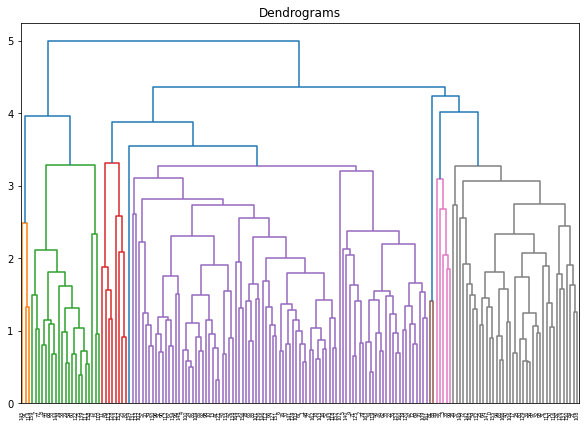

In [37]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pca_X, method='average'))

## DBSCAN 

In [38]:
#DBSCAN ON ORIGNAL DATA 
db = DBSCAN(eps = .025, min_samples = 50)
labels = db.fit_predict(data_cpy)
print(labels)
#we canoot compute silhouette_score because all data belongs to the same claa

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [39]:
 #DBSCAN using PCA 
db2 = DBSCAN(eps = 1.5, min_samples = 5)
db2.fit(pca_X)
print('DBSCAN', '\n', f'Silhouette Score: {silhouette_score(pca_X, db2.labels_)}')

DBSCAN 
 Silhouette Score: 0.14323816322533564


# Gaussian Mixture

In [40]:
#Gaussian Mixture on orignal data
gm = GaussianMixture(n_components=3)
gm.fit(data_cpy)
label = gm.predict(data_cpy)
print('Gaussian Mixture', '\n', f'Silhouette Score: {silhouette_score(data_cpy,label)}')

Gaussian Mixture 
 Silhouette Score: 0.5152042655681145


In [41]:
#Gaussian Mixture on standerized data
gm = GaussianMixture(n_components=3)
gm.fit(df_tran)
label = gm.predict(df_tran)
print('Gaussian Mixture', '\n', f'Silhouette Score: {silhouette_score(df_tran,label)}')

Gaussian Mixture 
 Silhouette Score: 0.21352486009532734


In [42]:
#Gaussian Mixture on pca 
gm = GaussianMixture(n_components=3)
gm.fit(pca_X)
label = gm.predict(pca_X)
print('Gaussian Mixture', '\n', f'Silhouette Score: {silhouette_score(pca_X,label)}')

Gaussian Mixture 
 Silhouette Score: 0.18842905670018104


# Conclusion

**KMEANS** ==> highset score on original data 
<br>
**DBSCAN** ==> only works on pca component not orignal data 
<br>
**GUASSIAN** ==> perfom better on orignal data 
<br>
**HIRERICAL** ==> works better on original data with avg link 